<a href="https://colab.research.google.com/github/mpHarm88/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/Mikio_Harman_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

url = 'https://raw.githubusercontent.com/mpHarm88/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'

import pandas as pd

#Installed previous version to get around bug involving pd.cut
# !pip install pandas==0.23.4

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [0]:
#Reading the CSV
df = pd.read_csv(url)
print(df.shape)

(1200, 4)


In [0]:
data = pd.DataFrame(df)

#Dropping the User ID Column
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head(10)

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182
5,58,103,165
6,55,161,107
7,21,188,37
8,55,216,79
9,50,127,267


In [135]:
#Putting weight, age, and exercise time into bins
age_Bins = pd.cut(data['age'], 3)
ex_Bins = pd.cut(data['exercise_time'], 3)
wt_Bins = pd.cut(data['weight'], 5)

#Creating a crosstab
pd.crosstab(ex_Bins, [age_Bins, ex_Bins], normalize='columns')

age            (17.938, 38.667]      ...       (59.333, 80.0]
exercise_time     (-0.3, 100.0]      ...       (200.0, 300.0]
exercise_time                        ...                     
(-0.3, 100.0]                 1      ...                    0
(100.0, 200.0]                0      ...                    0
(200.0, 300.0]                0      ...                    1

[3 rows x 9 columns]

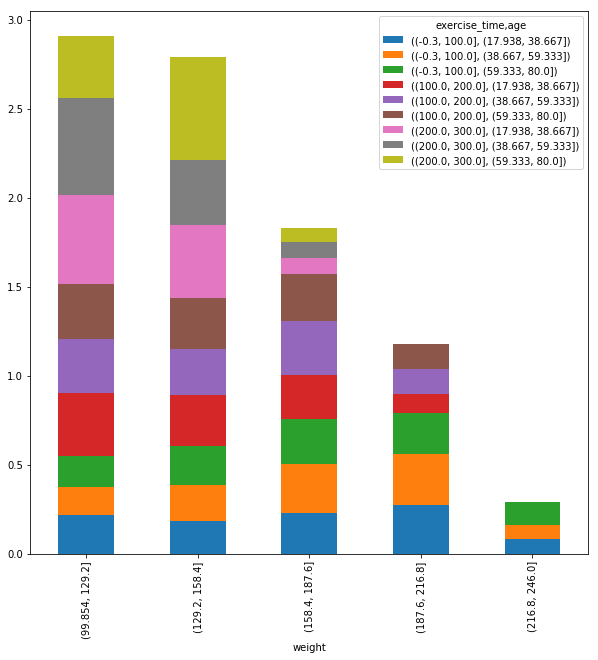

In [138]:

#Making my stacked barchart
crosstab = pd.crosstab(wt_Bins, [ex_Bins, age_Bins], normalize='columns')
crosstab.plot(kind='bar', figsize=(10,10), stacked=True)

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?

##Answers

1. Time and weight are continuous variables while age is a discrete variable.

2. As weight increases, the amount of time exercising per week decreases across all ages. This makes sense because the more you weigh the harder it is to exercise for longer periods of time.

3. The 'real' relationship is weight and exercise time. Individuals that weighed less exercised more versus those that weighed more. 

Age and exercise time is a spurious relationship because younger and older individuals exercised the same amount of time regardless of thier age.

Age and weight was also a spurious relationship.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)